In [20]:
import pandas as pd

In [ ]:
# Part 2 

In [ ]:
# 2.1 Data Loading

In [21]:
# Task 1: Load the dataset tweets.csv into a pandas DataFrame.
tweets_df = pd.read_csv('tweets.csv')
tweets_df

,Tweets,Retweets,Likes,Date
0,@PeterSchiff 🤣 thanks,209,7021,10/27/2022 16:17
1,@ZubyMusic Absolutely,755,26737,10/27/2022 13:19
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,10/27/2022 13:08
3,@BillyM2k 👻,802,19353,10/27/2022 2:32
4,Meeting a lot of cool people at Twitter today!,9366,195546,10/26/2022 21:39
...,...,...,...,...
3055,@LimitingThe @baglino Just that manganese is a...,171,3173,1/27/2022 22:01
3056,@incentives101 @ICRicardoLara Exactly,145,4234,1/27/2022 21:23
3057,@ICRicardoLara Your policies are directly resp...,421,6144,1/27/2022 21:13
3058,@ICRicardoLara You should be voted out of office,484,7029,1/27/2022 21:12


In [3]:
# Task 2: Display the last 10 rows of your dataset.
tweets_df.tail(10)

,Tweets,Retweets,Likes,Date
3050,@cybrtrkguy Vote them out,7712,68748,1/27/2022 23:41
3051,"If you scare people enough, they will demand r...",119804,543466,1/27/2022 23:39
3052,Seems odd that the UN still hasn’t released 20...,32799,262118,1/27/2022 22:24
3053,@jayvasdigital Freedom is being stripped away ...,12348,63170,1/27/2022 22:05
3054,@LimitingThe @baglino Manganese also requires ...,128,2543,1/27/2022 22:03
3055,@LimitingThe @baglino Just that manganese is a...,171,3173,1/27/2022 22:01
3056,@incentives101 @ICRicardoLara Exactly,145,4234,1/27/2022 21:23
3057,@ICRicardoLara Your policies are directly resp...,421,6144,1/27/2022 21:13
3058,@ICRicardoLara You should be voted out of office,484,7029,1/27/2022 21:12
3059,CB radios are free from govt/media control,11302,113429,1/27/2022 21:00


In [ ]:
# 2.2 Data Cleaning

In [5]:
import re
from textblob import TextBlob

In [6]:
# Task 3: Remove hyperlinks.

# Function to remove hyperlinks from a text string
def remove_hyperlinks(text):
    # Regular expression pattern to match URLs
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    
    # Replace URLs with an empty string
    cleaned_text = url_pattern.sub('', text)
    return cleaned_text

# Apply the function to the 'Tweets' column and store the result in a new column 'cleaned_tweet'
tweets_df['cleaned_tweet'] = tweets_df['Tweets'].apply(remove_hyperlinks)

# Display the first few rows of the DataFrame to see the cleaned tweets
tweets_df.head()

,Tweets,Retweets,Likes,Date,cleaned_tweet
0,@PeterSchiff 🤣 thanks,209,7021,10/27/2022 16:17,@PeterSchiff 🤣 thanks
1,@ZubyMusic Absolutely,755,26737,10/27/2022 13:19,@ZubyMusic Absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,10/27/2022 13:08,Dear Twitter Advertisers
3,@BillyM2k 👻,802,19353,10/27/2022 2:32,@BillyM2k 👻
4,Meeting a lot of cool people at Twitter today!,9366,195546,10/26/2022 21:39,Meeting a lot of cool people at Twitter today!


In [7]:
# Task 4: Remove stopwords. Stopwords are the words in any language which does not add much meaning to a
# sentence. They can safely be ignored without sacrificing the meaning of the sentence.
import nltk
from nltk.corpus import stopwords

# Download the stopwords and punkt tokenizer from the nltk library if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')

# Function to remove stopwords from a text string
def remove_stopwords(text):
    # Tokenize the text into a list of words
    words = nltk.word_tokenize(text)

    # Keep words that are not in the stopwords list
    cleaned_words = [word for word in words if word.lower() not in stopwords.words('english')]

    # Join the cleaned words back into a text string
    cleaned_text = ' '.join(cleaned_words)
    return cleaned_text

# Apply the function to the 'cleaned_tweet' column and store the result in the same column
tweets_df['cleaned_tweet'] = tweets_df['cleaned_tweet'].apply(remove_stopwords)

# Display the first few rows of the DataFrame to see the cleaned tweets
tweets_df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\m.achilefu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\m.achilefu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


,Tweets,Retweets,Likes,Date,cleaned_tweet
0,@PeterSchiff 🤣 thanks,209,7021,10/27/2022 16:17,@ PeterSchiff 🤣 thanks
1,@ZubyMusic Absolutely,755,26737,10/27/2022 13:19,@ ZubyMusic Absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,10/27/2022 13:08,Dear Twitter Advertisers
3,@BillyM2k 👻,802,19353,10/27/2022 2:32,@ BillyM2k 👻
4,Meeting a lot of cool people at Twitter today!,9366,195546,10/26/2022 21:39,Meeting lot cool people Twitter today !


In [8]:
# Task 5: Remove mentions. Here you want to remove the symbol ’@’ and the word that comes after it.
# Function to remove mentions from a text string
def remove_mentions(text):
    # Regular expression pattern to match mentions
    mention_pattern = re.compile(r'@\w+')
    
    # Replace mentions with an empty string
    cleaned_text = mention_pattern.sub('', text)
    return cleaned_text

# Apply the function to the 'cleaned_tweet' column and store the result in the same column
tweets_df['cleaned_tweet'] = tweets_df['cleaned_tweet'].apply(remove_mentions)

# Display the first few rows of the DataFrame to see the cleaned tweets
tweets_df.head()


,Tweets,Retweets,Likes,Date,cleaned_tweet
0,@PeterSchiff 🤣 thanks,209,7021,10/27/2022 16:17,@ PeterSchiff 🤣 thanks
1,@ZubyMusic Absolutely,755,26737,10/27/2022 13:19,@ ZubyMusic Absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,10/27/2022 13:08,Dear Twitter Advertisers
3,@BillyM2k 👻,802,19353,10/27/2022 2:32,@ BillyM2k 👻
4,Meeting a lot of cool people at Twitter today!,9366,195546,10/26/2022 21:39,Meeting lot cool people Twitter today !


In [9]:
# Task 6: Remove the hashtag. Here you want to remove the symbol ’#’ and keep the text that comes after it.
# Function to remove hashtag symbols from a text string
def remove_hashtags(text):
    # Replace hashtag symbols with an empty string
    cleaned_text = text.replace('#', '')
    return cleaned_text

# Apply the function to the 'cleaned_tweet' column and store the result in the same column
tweets_df['cleaned_tweet'] = tweets_df['cleaned_tweet'].apply(remove_hashtags)

# Display the first few rows of the DataFrame to see the cleaned tweets
tweets_df.head()

,Tweets,Retweets,Likes,Date,cleaned_tweet
0,@PeterSchiff 🤣 thanks,209,7021,10/27/2022 16:17,@ PeterSchiff 🤣 thanks
1,@ZubyMusic Absolutely,755,26737,10/27/2022 13:19,@ ZubyMusic Absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,10/27/2022 13:08,Dear Twitter Advertisers
3,@BillyM2k 👻,802,19353,10/27/2022 2:32,@ BillyM2k 👻
4,Meeting a lot of cool people at Twitter today!,9366,195546,10/26/2022 21:39,Meeting lot cool people Twitter today !


In [10]:
# Task 7: Remove punctuation signs.
import string

# Function to remove punctuation signs from a text string
def remove_punctuation(text):
    # Keep characters that are not punctuation signs
    cleaned_text = ''.join([char for char in text if char not in string.punctuation])

    return cleaned_text

# Apply the function to the 'cleaned_tweet' column and store the result in the same column
tweets_df['cleaned_tweet'] = tweets_df['cleaned_tweet'].apply(remove_punctuation)

# Display the first few rows of the DataFrame to see the cleaned tweets
tweets_df.head()


,Tweets,Retweets,Likes,Date,cleaned_tweet
0,@PeterSchiff 🤣 thanks,209,7021,10/27/2022 16:17,PeterSchiff 🤣 thanks
1,@ZubyMusic Absolutely,755,26737,10/27/2022 13:19,ZubyMusic Absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,10/27/2022 13:08,Dear Twitter Advertisers
3,@BillyM2k 👻,802,19353,10/27/2022 2:32,BillyM2k 👻
4,Meeting a lot of cool people at Twitter today!,9366,195546,10/26/2022 21:39,Meeting lot cool people Twitter today


In [11]:
# Task 8: Remove the word ”RT”
# Function to remove the word "RT" from a text string
def remove_RT(text):
    # Replace the word "RT" with an empty string
    cleaned_text = text.replace('RT', '')
    return cleaned_text

# Apply the function to the 'cleaned_tweet' column and store the result in the same column
tweets_df['cleaned_tweet'] = tweets_df['cleaned_tweet'].apply(remove_RT)

# Display the first few rows of the DataFrame to see the cleaned tweets
tweets_df.head()

,Tweets,Retweets,Likes,Date,cleaned_tweet
0,@PeterSchiff 🤣 thanks,209,7021,10/27/2022 16:17,PeterSchiff 🤣 thanks
1,@ZubyMusic Absolutely,755,26737,10/27/2022 13:19,ZubyMusic Absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,10/27/2022 13:08,Dear Twitter Advertisers
3,@BillyM2k 👻,802,19353,10/27/2022 2:32,BillyM2k 👻
4,Meeting a lot of cool people at Twitter today!,9366,195546,10/26/2022 21:39,Meeting lot cool people Twitter today


In [12]:
# Task 9: Remove emojis.
# Function to remove emojis from a text string
def remove_emojis(text):
    # Remove characters that are within the Unicode ranges for emojis
    cleaned_text = text.encode('ascii', 'ignore').decode('ascii')

    return cleaned_text

# Apply the function to the 'cleaned_tweet' column and store the result in the same column
tweets_df['cleaned_tweet'] = tweets_df['cleaned_tweet'].apply(remove_emojis)

# Display the first few rows of the DataFrame to see the cleaned tweets
tweets_df.head()

,Tweets,Retweets,Likes,Date,cleaned_tweet
0,@PeterSchiff 🤣 thanks,209,7021,10/27/2022 16:17,PeterSchiff thanks
1,@ZubyMusic Absolutely,755,26737,10/27/2022 13:19,ZubyMusic Absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,10/27/2022 13:08,Dear Twitter Advertisers
3,@BillyM2k 👻,802,19353,10/27/2022 2:32,BillyM2k
4,Meeting a lot of cool people at Twitter today!,9366,195546,10/26/2022 21:39,Meeting lot cool people Twitter today


In [13]:
# Task 10: Remove leading and trailing whitespaces.
# Function to remove leading and trailing whitespaces from a text string
def remove_whitespace(text):
    # Remove leading and trailing whitespaces
    cleaned_text = text.strip()

    return cleaned_text

# Apply the function to the 'cleaned_tweet' column and store the result in the same column
tweets_df['cleaned_tweet'] = tweets_df['cleaned_tweet'].apply(remove_whitespace)

# Display the first few rows of the DataFrame to see the cleaned tweets
tweets_df.head()


,Tweets,Retweets,Likes,Date,cleaned_tweet
0,@PeterSchiff 🤣 thanks,209,7021,10/27/2022 16:17,PeterSchiff thanks
1,@ZubyMusic Absolutely,755,26737,10/27/2022 13:19,ZubyMusic Absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,10/27/2022 13:08,Dear Twitter Advertisers
3,@BillyM2k 👻,802,19353,10/27/2022 2:32,BillyM2k
4,Meeting a lot of cool people at Twitter today!,9366,195546,10/26/2022 21:39,Meeting lot cool people Twitter today


In [15]:
# Task 11: Apply lemmatization on every word.
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download WordNet and omw-1.4 data if not already downloaded
nltk.download('wordnet')
nltk.download('omw-1.4')

# Instantiate the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to apply lemmatization on every word in a text string
def lemmatize_words(text):
    # Tokenize the text into a list of words
    words = word_tokenize(text)

    # Apply lemmatization to each word
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Join the lemmatized words back into a text string
    lemmatized_text = ' '.join(lemmatized_words)
    return lemmatized_text

# Apply the function to the 'cleaned_tweet' column and store the result in the same column
tweets_df['cleaned_tweet'] = tweets_df['cleaned_tweet'].apply(lemmatize_words)

# Display the first few rows of the DataFrame to see the cleaned tweets
tweets_df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\m.achilefu\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\m.achilefu\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,Tweets,Retweets,Likes,Date,cleaned_tweet
0,@PeterSchiff 🤣 thanks,209,7021,10/27/2022 16:17,PeterSchiff thanks
1,@ZubyMusic Absolutely,755,26737,10/27/2022 13:19,ZubyMusic Absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,10/27/2022 13:08,Dear Twitter Advertisers
3,@BillyM2k 👻,802,19353,10/27/2022 2:32,BillyM2k
4,Meeting a lot of cool people at Twitter today!,9366,195546,10/26/2022 21:39,Meeting lot cool people Twitter today


In [16]:
# Task 12: Store the cleaned tweet in a new column called tweet cleaned.

# Rename the 'cleaned_tweet' column to 'tweet_cleaned'
tweets_df.rename(columns={'cleaned_tweet': 'tweet_cleaned'}, inplace=True)

# Display the first few rows of the DataFrame to see the 'tweet_cleaned' column
tweets_df.head()


,Tweets,Retweets,Likes,Date,tweet_cleaned
0,@PeterSchiff 🤣 thanks,209,7021,10/27/2022 16:17,PeterSchiff thanks
1,@ZubyMusic Absolutely,755,26737,10/27/2022 13:19,ZubyMusic Absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,10/27/2022 13:08,Dear Twitter Advertisers
3,@BillyM2k 👻,802,19353,10/27/2022 2:32,BillyM2k
4,Meeting a lot of cool people at Twitter today!,9366,195546,10/26/2022 21:39,Meeting lot cool people Twitter today


In [ ]:
# 2.3 Sentiment Analysis

In [ ]:
# Task 13: (a) Can you think of reasons why we would or would not manually annotate our whole dataset? [2 marks]

In [29]:
# Reasons to manually annotate the whole dataset:

# - Accuracy: Manual annotation, when done by domain experts or annotators with a clear understanding of the context, can provide high accuracy in sentiment classification.
# - Handling nuances: Human annotators are generally better at understanding linguistic nuances, sarcasm, and context-specific meanings that might be difficult for an algorithm to detect.

In [ ]:
#Reasons not to manually annotate the whole dataset:

# - Scalability: Manually annotating a large dataset can be time-consuming and labor-intensive, making it challenging to scale to bigger datasets.
# - Consistency: Human annotators may have subjective interpretations of the text, leading to inconsistencies in the annotation.
# - Cost: Manual annotation can be expensive, as it involves paying annotators or experts for their time and effort.

In [31]:
# Task 13: (b) Can you propose alternative ways to do this?

#There are alternative ways to perform sentiment analysis on text data. Some of these methods include:

#Lexicon-based approach: This method involves using a pre-built sentiment lexicon (a list of words with associated sentiment scores) to determine the sentiment of a given text. The sentiment scores of individual words in the text are combined to calculate an overall sentiment score for the text.

#Rule-based approach: This method combines the lexicon-based approach with a set of rules that consider the grammatical structure and context of the text. For example, negations and intensifiers can be taken into account to adjust sentiment scores accordingly.

#Machine learning-based approach: In this method, a machine learning model is trained on a labeled dataset to classify text into sentiment categories. Various machine learning algorithms, such as Naive Bayes, Support Vector Machines, and Decision Trees, can be used for this purpose.

#Deep learning-based approach: Deep learning models, such as Recurrent Neural Networks (RNN), Long Short-Term Memory (LSTM) networks, and Transformer-based models like BERT, can be used for sentiment analysis. These models can capture complex patterns and contextual information in text data, leading to improved performance compared to traditional machine learning methods.

#These alternative methods offer different trade-offs in terms of complexity, interpretability, and performance. The choice of the best method for a specific problem depends on factors such as data availability, required accuracy, and computational resources.



In [17]:
# Task 14: Add a column sentiment to the dataframe. If the polarity is > 0, the sentiment is positive. If it is < 0, the sentiment is negative. Else, the sentiment is neutral.

from textblob import TextBlob

# Function to get the polarity
def getPolarity(twt):
    return TextBlob(twt).sentiment.polarity

# Apply the function to the 'tweet_cleaned' column and store the result in a new column 'Polarity'
tweets_df['Polarity'] = tweets_df['tweet_cleaned'].apply(getPolarity)

# Function to classify the sentiment based on the polarity value
def classify_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to the 'Polarity' column and store the result in a new column 'sentiment'
tweets_df['sentiment'] = tweets_df['Polarity'].apply(classify_sentiment)

# Display the first few rows of the DataFrame to see the 'sentiment' column
tweets_df.head()

,Tweets,Retweets,Likes,Date,tweet_cleaned,Polarity,sentiment
0,@PeterSchiff 🤣 thanks,209,7021,10/27/2022 16:17,PeterSchiff thanks,0.20,positive
1,@ZubyMusic Absolutely,755,26737,10/27/2022 13:19,ZubyMusic Absolutely,0.20,positive
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,10/27/2022 13:08,Dear Twitter Advertisers,0.00,neutral
3,@BillyM2k 👻,802,19353,10/27/2022 2:32,BillyM2k,0.00,neutral
4,Meeting a lot of cool people at Twitter today!,9366,195546,10/26/2022 21:39,Meeting lot cool people Twitter today,0.35,positive


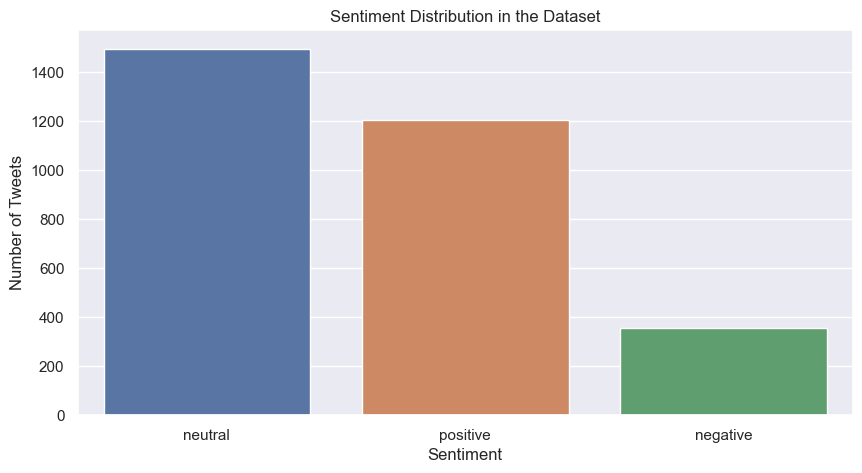

In [18]:
# Task 15: Use an appropriate plot(s) to show how sentiment is distributed in the dataset? Question: Comment on this.

import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each sentiment
sentiment_counts = tweets_df['sentiment'].value_counts()

# Set the style for the plot
sns.set(style="darkgrid")

# Create a bar plot using the sentiment counts
plt.figure(figsize=(10, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)

# Set the title and labels for the plot
plt.title("Sentiment Distribution in the Dataset")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")

# Show the plot
plt.show()


In [ ]:
#Dominant neutral sentiment: With approximately 14,100 neutral tweets, the dataset is heavily skewed towards neutral sentiment. This suggests that most of the tweets in the dataset do not express strong positive or negative opinions. This could be due to the nature of the content in the tweets or because the sentiment analysis technique used (TextBlob) might not be able to accurately capture the sentiment for certain types of text.

#Positive sentiment: The dataset contains about 1,200 positive tweets, which is significantly lower than the number of neutral tweets. However, it is still higher than the number of negative tweets. This indicates that, among the tweets with a discernible sentiment, there is a greater inclination towards positive sentiment.

#Negative sentiment: The dataset contains the lowest number of negative tweets, with only around 300 tweets classified as negative. This suggests that negative sentiment is relatively rare in the dataset, and the overall sentiment expressed in the tweets is more optimistic or neutral.

In [ ]:
#Positive sentiment: If the number of positive tweets is higher than negative and neutral tweets, it indicates that the majority of tweets in the dataset have a positive sentiment. This could suggest that the overall sentiment expressed in the tweets is optimistic or favorable.

#Negative sentiment: If the number of negative tweets is higher than positive and neutral tweets, it indicates that the majority of tweets in the dataset have a negative sentiment. This could suggest that the overall sentiment expressed in the tweets is pessimistic or unfavorable.

#Neutral sentiment: If the number of neutral tweets is higher than positive and negative tweets, it indicates that the majority of tweets in the dataset have a neutral sentiment. This could suggest that the overall sentiment expressed in the tweets is neither optimistic nor pessimistic, or it might be difficult to determine the sentiment from the text.

#Balance between sentiment categories: If the distribution of sentiments is relatively balanced, it suggests that the dataset contains a mix of opinions and perspectives. This can provide a more comprehensive view of the sentiment expressed in the tweets.

In [19]:
# Task 16: (a) What are the 10 most common words in each sentiment?

from collections import Counter
from nltk.tokenize import word_tokenize

# Separate the tweets based on their sentiment
positive_tweets = tweets_df[tweets_df['sentiment'] == 'positive']['tweet_cleaned']
negative_tweets = tweets_df[tweets_df['sentiment'] == 'negative']['tweet_cleaned']
neutral_tweets = tweets_df[tweets_df['sentiment'] == 'neutral']['tweet_cleaned']

# Function to get the 10 most common words
def most_common_words(tweets):
    words = []
    for tweet in tweets:
        for word in word_tokenize(tweet):
            words.append(word.lower())
    word_counts = Counter(words)
    return word_counts.most_common(10)

# Get the 10 most common words for each sentiment
most_common_positive = most_common_words(positive_tweets)
most_common_negative = most_common_words(negative_tweets)
most_common_neutral = most_common_words(neutral_tweets)

# Print the results
print("10 most common words in positive tweets:", most_common_positive)
print("10 most common words in negative tweets:", most_common_negative)
print("10 most common words in neutral tweets:", most_common_neutral)

10 most common words in positive tweets: [('amp', 158), ('tesla', 110), ('good', 98), ('true', 73), ('twitter', 72), ('wholemarsblog', 72), ('spacex', 69), ('much', 64), ('many', 64), ('would', 64)]
10 most common words in negative tweets: [('amp', 86), ('tesla', 35), ('wholemarsblog', 27), ('year', 24), ('teslaownerssv', 23), ('twitter', 22), ('spacex', 21), ('one', 21), ('would', 21), ('bad', 20)]
10 most common words in neutral tweets: [('billym2k', 89), ('teslaownerssv', 79), ('wholemarsblog', 78), ('tesla', 72), ('yes', 66), ('twitter', 61), ('ppathole', 58), ('spacex', 55), ('amp', 44), ('evafoxu', 37)]


In [ ]:
# Task: 16 (b) Use an appropriate plot(s) to visualize this. Question: Comment on this.

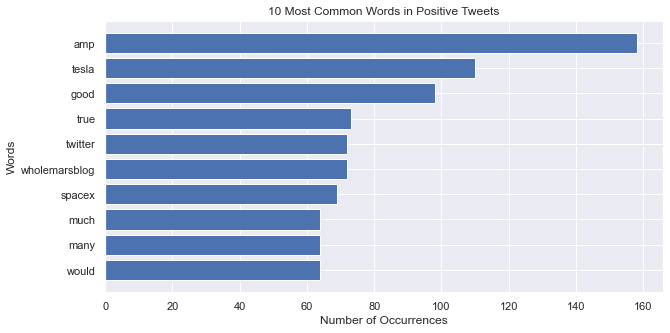

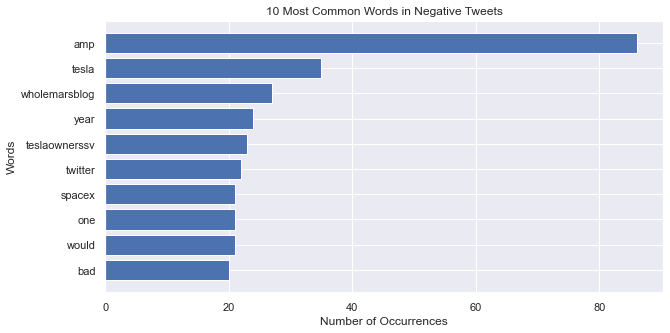

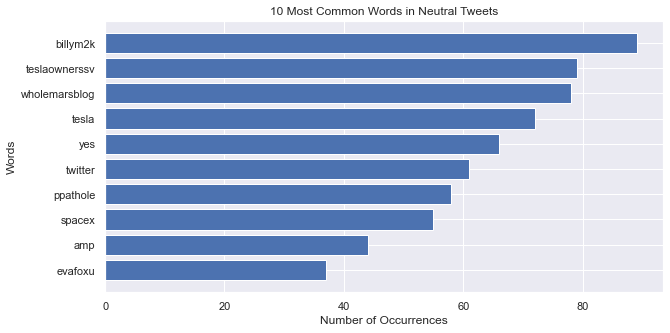

In [35]:
def plot_most_common_words(most_common, sentiment):
    words, counts = zip(*most_common)
    
    # Create a horizontal bar plot for the 10 most common words
    plt.figure(figsize=(10, 5))
    plt.barh(range(len(words)), counts, align='center')
    
    # Set the y-axis tick labels and invert the y-axis
    plt.yticks(range(len(words)), words)
    plt.gca().invert_yaxis()
    
    # Set the title and labels for the plot
    plt.title(f"10 Most Common Words in {sentiment.capitalize()} Tweets")
    plt.xlabel("Number of Occurrences")
    plt.ylabel("Words")

# Plot the most common words for each sentiment
plot_most_common_words(most_common_positive, 'positive')
plt.show()
plot_most_common_words(most_common_negative, 'negative')
plt.show()
plot_most_common_words(most_common_neutral, 'neutral')
plt.show()


In [ ]:
#Unique words in each sentiment category: Observe the words that are unique to each sentiment category. For example, positive tweets might have words like "love," "great," and "happy," while negative tweets might have words like "sad," "hate," and "angry." These unique words can help provide insights into the characteristics of each sentiment.

#Common words across sentiment categories: Identify any words that are common across multiple sentiment categories. These words might be less informative about the sentiment of the tweets, as they appear in different contexts. For example, words like "movie" or "show" might be common across all sentiment categories if the dataset is related to movies and TV shows.

#Frequency distribution: Notice the differences in the frequencies of the most common words between sentiment categories. This can provide insights into how strongly the words are associated with each sentiment. For example, a word with a high frequency in positive tweets and low frequency in negative tweets might be a strong indicator of positive sentiment.

#Context and domain: Consider the context and domain of the dataset when analyzing the most common words. For example, if the dataset is related to a specific event, product, or topic, the most common words might be directly related to that context.

In [ ]:
# Task 17: Use an appropriate plot to show the number of Likes and Retweets per sentiment. Question: Comment on this.

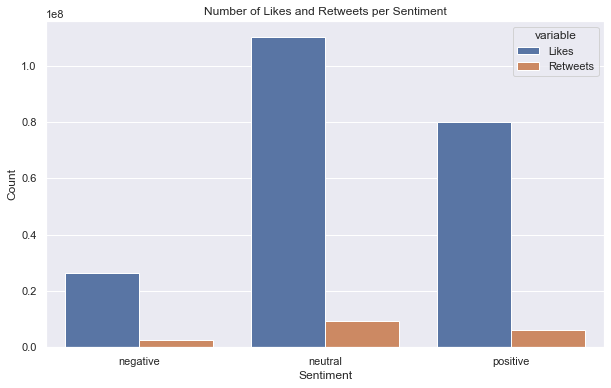

In [36]:
import seaborn as sns

# Group the dataset by sentiment and calculate the sum of Likes and Retweets
grouped_sentiment = tweets_df.groupby('sentiment').agg({'Likes': 'sum', 'Retweets': 'sum'}).reset_index()

# Create a grouped bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='sentiment', y='value', hue='variable', data=pd.melt(grouped_sentiment, id_vars='sentiment', var_name='variable', value_name='value'))

# Set the title and labels for the plot
plt.title("Number of Likes and Retweets per Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [ ]:
#Popularity of sentiments: Observe which sentiment category has the highest number of Likes and Retweets. This will give you an idea of which sentiment is more popular or resonates more with the audience.

#Likes vs. Retweets: Compare the number of Likes and Retweets within each sentiment category. This can provide insights into how people engage with tweets of different sentiments. For example, if positive tweets receive more Likes but fewer Retweets than negative tweets, it might suggest that users prefer to share negative content rather than positive content.

#Proportional differences: Look at the proportional differences between sentiment categories in terms of Likes and Retweets. If one sentiment category has significantly more Likes and Retweets than others, it might indicate a stronger preference or reaction to that type of sentiment among the users.

#Context and domain: Consider the context and domain of the dataset when analyzing the number of Likes and Retweets per sentiment. The popularity of certain sentiments and the engagement patterns might be influenced by the topic, event, or product the dataset is related to.
